In [135]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [136]:
ana_labels = {
    "Before" : [
        "preselection_CRY_onspill-LH_aw_bug",
        "preselection_signal_onspill-LH_aw_bug"
    ],
    
    "After" : [
        "preselection_CRY_onspill-LH_aw",
        "preselection_signal_onspill-LH_aw"
    ]
}

In [137]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/preselection_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/preselection_signal_onspill-LH_aw/results.pkl


In [101]:
# hist_names = list(results["Before"]["preselection_CRY_onspill-LH_aw_bug"]["hists"].keys())
# print(hist_names)
# print(len(hist_names))

In [138]:
draw = Draw()
plot = Plot()

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised
[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [139]:
def plot_hists(hist_name, axis, data_configs, styles, **plot_settings):
    """Plot multiple histograms with settings unpacked from kwargs."""
    
    # Extract ylim_factor, default to 1.2 if not provided
    ylim_factor = plot_settings.pop("ylim_factor", 1.2)
    
    for config in data_configs:  # This loops through your data configurations
        hist_obj = results[config["reco"]][config["analysis"]]["hists"][hist_name]
        h_sel = hist_obj[{"selection": ["Preselect"]}]
        
        h_sel.plot1d(
            **styles[config["label"]],
            overlay="selection", 
            ax=axis, 
            label=config["label"], 
            flow="none"
        )
    
    axis.set_yscale("log")
    
    # Extend y-axis
    ylim = axis.get_ylim()
    axis.set_ylim(ylim[0], ylim[1] * ylim_factor)
    
    # Apply legend with remaining kwargs
    axis.legend(**plot_settings)

In [148]:
labels = labels = ["CRY (before)", "CRY (after)", "CeEndpoint (before)", "CeEndpoint (after)"]

# Data configuration
data_configs = [
    {"reco": "Before", "analysis": "preselection_CRY_onspill-LH_aw_bug", "label": labels[0]},
    {"reco": "After", "analysis": "preselection_CRY_onspill-LH_aw", "label": labels[1]},
    {"reco": "Before", "analysis": "preselection_signal_onspill-LH_aw_bug", "label": labels[2]},
    {"reco": "After", "analysis": "preselection_signal_onspill-LH_aw", "label": labels[3]}
]


styles = {
    "CRY (before)": {"color": "#C41E3A", "histtype": "bar", "alpha": 0.4},
     "CRY (after)": {"color": "#C41E3A", "linewidth": 2},
     "CeEndpoint (before)": {"color": "#228B22", "histtype": "bar", "alpha": 0.4},
     "CeEndpoint (after)": {"color": "#228B22", "linewidth": 2},
}

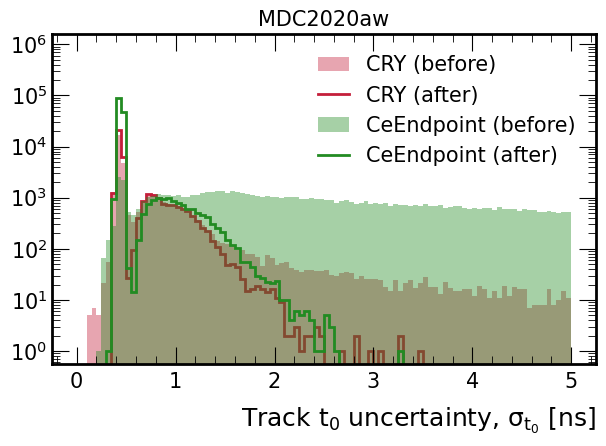

In [160]:
# Subplot styling 
subplot_configs = [
    {"hist": "t0err", "loc": "upper right", "ncol": 1, "ylim_factor": 10}
]

fig, ax = plt.subplots() 

# Get the configuration and extract the histogram name
subplot_config = subplot_configs[0].copy()  # Get first (and only) config
hist_name = subplot_config.pop("hist")  # Remove hist name from settings

plot_hists(
    hist_name, ax, data_configs, styles,  # Use the extracted hist_name
    **subplot_config  # Unpack the remaining settings (without 'hist')
)

ax.set_title("MDC2020aw")
plt.tight_layout()
plt.show()

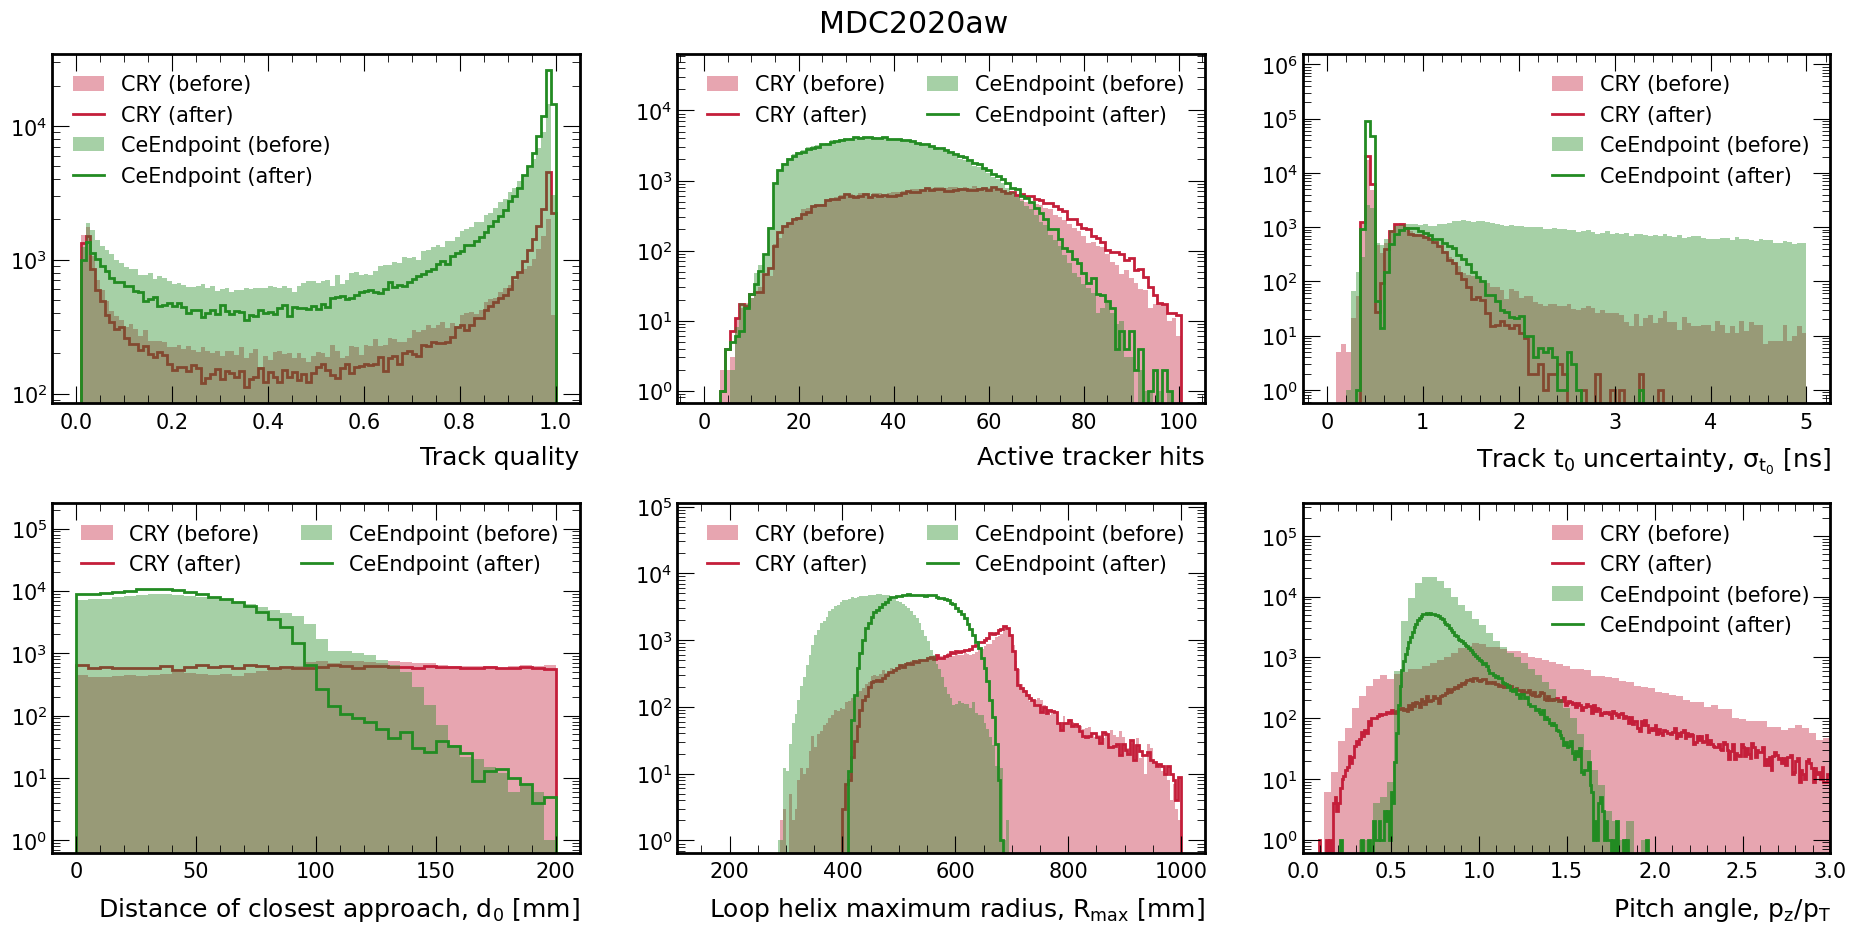

In [180]:
# Subplot styling 
subplot_configs = [
    # Row 0
    {"hist": "trkqual",    "loc": "upper left",  "ncol": 1, "ylim_factor": 1},
    {"hist": "nactive",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
    {"hist": "t0err",      "loc": "upper right", "ncol": 1, "ylim_factor": 10},
    # Row 1  
    {"hist": "d0",         "loc": "upper right",  "ncol": 2, "ylim_factor": 15},
    {"hist": "maxr",       "loc": "upper right", "ncol": 2, "ylim_factor": 15},
    {"hist": "pitch_angle","loc": "upper right",  "ncol": 1, "ylim_factor": 10}
]

fig, ax = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# Plot with both configurations
for subplot_config, axis in zip(subplot_configs, ax.flat):
    subplot_config_copy = subplot_config.copy()  # Don"t modify original
    hist_name = subplot_config_copy.pop("hist")
    
    plot_hists(
        hist_name, axis, data_configs, styles,  # Use data_configs here
        **subplot_config_copy
    )

# Details
ax[1,2].set_xlim(0, 3)

plt.suptitle("MDC2020aw")
# Add padding at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 1.02])

# plt.tight_layout()
plt.show()

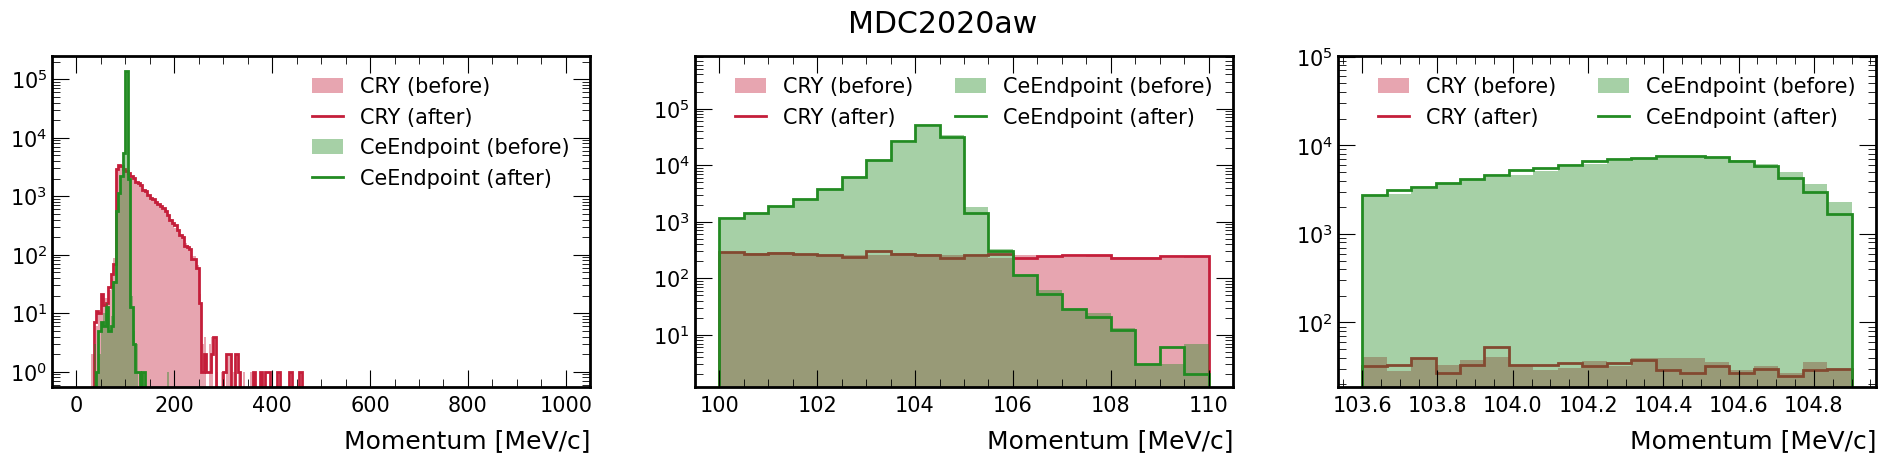

In [174]:
# Subplot styling 
subplot_configs = [
    {"hist": "mom_full",    "loc": "upper right",  "ncol": 1, "ylim_factor": 1},
    {"hist": "mom_ext",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
    {"hist": "mom_sig",      "loc": "upper right", "ncol": 2, "ylim_factor": 10}
]

fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8))

# Plot with both configurations
for subplot_config, axis in zip(subplot_configs, ax.flat):
    subplot_config_copy = subplot_config.copy()  # Don"t modify original
    hist_name = subplot_config_copy.pop("hist")
    
    plot_multiple_histograms_flat(
        hist_name, axis, data_configs, styles,  # Use data_configs here
        **subplot_config_copy
    )

plt.suptitle("MDC2020aw")
# Add padding at the top for the suptitle
plt.tight_layout(rect=[0, 0, 1, 1.075])

out_path="../../output/images/comp/h1o_1x3_mom_aw_reproc.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")

# plt.tight_layout()
plt.show()

In [130]:
# styles = Skip to main panel
# /
# /notebooks/comp/
# Selection deleted
# # Subplot styling 
# subplot_configs = [
#     # Row 0
#     {"hist": "trkqual",    "loc": "upper left",  "ncol": 1, "ylim_factor": 1},
#     {"hist": "nactive",    "loc": "upper right", "ncol": 2, "ylim_factor": 10},
#     {"hist": "t0err",      "loc": "upper right", "ncol": 1, "ylim_factor": 10},
#     # Row 1  
#     {"hist": "d0",         "loc": "upper right",  "ncol": 2, "ylim_factor": 15},
#     {"hist": "maxr",       "loc": "upper right", "ncol": 2, "ylim_factor": 15},
#     {"hist": "pitch_angle","loc": "upper right",  "ncol": 1, "ylim_factor": 10}
# ]

# fig, ax = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# # Plot with both configurations
# for subplot_config, axis in zip(subplot_configs, ax.flat):
#     subplot_config_copy = subplot_config.copy()  # Don"t modify original
#     hist_name = subplot_config_copy.pop("hist")
    
#     plot_multiple_histograms_flat(
#         hist_name, axis, data_configs, styles,  # Use data_configs here
#         **subplot_config_copy
#     )

# # Details
# ax[1,2].set_xlim(0, 3)

# plt.tight_layout()
# plt.show()
# Selection deleted
# # Subplot styling 
# subplot_configs = [
#     {"hist": "mom_full",    "loc": "upper left",  "ncol": 2, "ylim_factor": 1.4},
#     {"hist": "mom_ext",    "loc": "upper right", "ncol": 1, "ylim_factor": 1.3},
#     {"hist": "mom_sig",      "loc": "upper right", "ncol": 2, "ylim_factor": 1.5}
# ]

# fig, ax = plt.subplots(1, 3, figsize=(6.4*3, 4.8))

# # Plot with both configurations
# for subplot_config, axis in zip(subplot_configs, ax.flat):
#     subplot_config_copy = subplot_config.copy()  # Don"t modify original
#     hist_name = subplot_config_copy.pop("hist")
    
#     plot_multiple_histograms_flat(
#         hist_name, axis, data_configs, styles,  # Use data_configs here
#         **subplot_config_copy
#     )

# plt.show()
# styles

# {"CRY (before)": {"color": "#C41E3A", "histtype": "bar", "alpha": 0.3},
#  "CRY (after)": {"color": "#C41E3A"},
#  "CeEndpoint (before)": {"color": "#228B22", "histtype": "bar", "alpha": 0.5},
#  "CeEndpoint (after)": {"color": "#228B22"}}

{'CRY (before)': {'color': '#C41E3A', 'histtype': 'bar', 'alpha': 0.3},
 'CRY (after)': {'color': '#C41E3A'},
 'CeEndpoint (before)': {'color': '#228B22', 'histtype': 'bar', 'alpha': 0.5},
 'CeEndpoint (after)': {'color': '#228B22'}}